# Report by: Muhammad Firdaus Abdullah


# **Title**: Predict Student's Dropout and Academic Success

<img src="https://hips.hearstapps.com/hmg-prod/images/graduation-day-royalty-free-image-1647266748.jpg?crop=0.668xw:1.00xh;0.167xw,0&resize=1200:*" alt="Example Image" style="display: block; margin-left: auto; margin-right: auto; width: 50%;">


# Outline
- [1 - Dataset Description](#1)
- [2 - Problem statement](#2)
- [3 - Packages](#3)
- [4 - Dataset](#4)
    - [4.1 - Data Exploration](#4.1)
- [5 - Data Visualization and Preprocessing](#5)
    - [5.1 - Class Distribution](#5.1)
    - [5.2 - Feature Selection](#5.2)
- [6 - Model Training and Evaluation](#6)
    - [6.1 - Split  feature and target, X and y](#6.1)
    - [6.2 - Feature Scaling](#6.2)
    - [6.3 - Split Dataset to Test Set and Train Data](#6.3)
    - [6.4 - Prepare Machine Learning Model](#6.4)
- [7 - Hyperparameter Tuning](#7)
    - [7.1 - Build function for Grid Search Cross-Validation](#7.1)
    - [7.2 - Tuning Model](#7.2)
- [8 - Results and Discussion](#8)


<a name="1"></a>
## 1 - Dataset Description 
**Title:** Predicting Students' Dropout and Academic Success

**Dataset Source:** Higher education institution (acquired from several disjoint databases)

**Dataset Link:** [https://archive.ics.uci.edu/static/public/697/data.csv](https://archive.ics.uci.edu/static/public/697/data.csv)

**Date Donated:** 12/12/2021

**Description:**
The dataset consists of information related to students enrolled in various undergraduate degree programs, including agronomy, design, education, nursing, journalism, management, social service, and technologies. It was created to analyze and predict students' dropout and academic success based on their academic path, demographics, social-economic factors, and academic performance at the end of the first and second semesters.

**Features:**

Academic Path: The undergraduate degree program in which the student is enrolled.
Demographics: Information about the students' demographics, such as age, gender, ethnicity, and residency status.
Social-Economic Factors: Variables related to the students' socio-economic background, including parental education level, household income, and employment status.
Academic Performance: Grades and other indicators of academic performance at the end of the first and second semesters, such as GPA, course completion rates, and participation in academic support programs.<br><br>
**Target Variable:**<br><br>
The target variable is formulated as a three-category classification task, with the following classes:
- 1 - Dropout: Students who discontinue their studies before completing their degree program.
- 2 - Academic Success: Students who successfully complete their degree program.
- 3 - Intermediate: Students who neither dropout nor achieve academic success. This category may include students on academic probation or those with marginal academic performance.

<a name="2"></a>
## 2 - Problem statement 
Identify students facing academic risks during the early stages of their educational journey. By discerning these at-risk students, the project intends to implement targeted support strategies, thereby fostering improved academic outcomes and retention rates.




<a name="3"></a>
## 3 - Packages 
There are six core Python packages that we'll be utilizing throughout this project:

1. **NumPy:** A fundamental library for numerical computing in Python. It provides efficient data structures like arrays and matrices, along with mathematical functions for calculations and manipulations.

2. **Pandas:** A high-level library built upon NumPy, specifically designed for data analysis and manipulation. It excels at:
    - **Reading CSV Files:** The `pandas.read_csv` function seamlessly imports data from CSV files, enabling the integration of external datasets into your Python environment.
    - **Customizing Data Handling:** The `pandas.set_option` function offers flexibility by allowing you to configure various options that control the behavior of the Pandas library according to your specific requirements. This empowers you to tailor data handling to your project's needs.

3. **Matplotlib:** A versatile library for creating static, animated, and interactive visualizations in Python. Notably, its `matplotlib.pyplot` module provides a comprehensive set of functions for generating various plot types, including:
    - Line plots
    - Scatter plots
    - Histograms
    - Bar plots
    - And many more
These visualizations are instrumental in exploring data distributions, trends, and relationships within your datasets.

4. **Seaborn:** A high-level visualization library built on top of Matplotlib. Seaborn offers a user-friendly interface for creating aesthetically pleasing and informative statistical graphics, often leveraging Matplotlib under the hood. It streamlines the creation of various chart types commonly used in data exploration and analysis.

5. **Scikit-learn:** A powerful machine learning library that provides a comprehensive set of tools for various machine learning tasks, including:
    - Classification: Categorizing data points into predefined classes.
    - Regression: Modeling relationships between variables to predict continuous outcomes.
    - Clustering: Grouping similar data points together.
    - Dimensionality reduction: Simplifying complex datasets by reducing the number of features while preserving essential information.
    - Model selection and evaluation: Selecting the best model for your problem and assessing its performance.
    - And more

In [116]:
# For numerical computations and data manipulation
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For reading CSV files
from pandas import read_csv

# For setting options in pandas
from pandas import set_option

# For preprocessing data
from sklearn import preprocessing

# For label encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# For standardizing features
from sklearn.preprocessing import StandardScaler

# For scaling features to a range
from sklearn.preprocessing import MinMaxScaler

# For logistic regression modeling
from sklearn.linear_model import LogisticRegression

# For building ensemble models
from sklearn.ensemble import RandomForestClassifier

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For logistic regression modeling
from sklearn.linear_model import LogisticRegression

# For cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

# For evaluating model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

# For hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV

# For handling convergence warnings
from sklearn.exceptions import ConvergenceWarning

# For classification using k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

# For classification using decision trees
from sklearn.tree import DecisionTreeClassifier

# For ignoring warnings
import warnings


<a name="4"></a>
## 4 - Dataset 

In [117]:
# Load data from the UCI Machine Learning Repository using pandas.read_csv
data = pd.read_csv("https://archive.ics.uci.edu/static/public/697/data.csv")

# Print the shape of the data (number of rows and columns) to get an initial understanding of the data dimensions
print(data.shape)

(4424, 37)


<a name="4.1"></a>
### 4.1 - Data Exploration

#### Looking at the Raw Data

In [118]:
# Peek at the first 20 rows of the 'data' DataFrame to get a quick overview of its structure and content.
peek = data.head(20)
print(peek)

    Marital Status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  Previous qualification (grade)  \
0                1                17                  5     171                           1                       1                           122.0   
1                1                15                  1    9254                           1                       1                           160.0   
2                1                 1                  5    9070                           1                       1                           122.0   
3                1                17                  2    9773                           1                       1                           122.0   
4                2                39                  1    8014                           0                       1                           100.0   
5                2                39                  1    9991                           0   

#### Data Types

In [119]:
# Print the data types of each column in the DataFrame
types = data.dtypes
print(types)

Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

#### Renaming feature
- Changing Nacionality to Nationality in dataset to avoid python treat it as a different identifier, potentially leading to errors or unexpected behavior in the code.

In [120]:
# Rename column "Nacionality" to the more standard spelling "Nationality"
# and print informative summary of the DataFrame.
data = data.rename(columns={"Nacionality": "Nationality"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#### Descriptive Statistics
Descriptive statistics offer valuable insights into the characteristics of each attribute.

In [121]:
# Set pandas display width to 150 characters for better readability of the output
set_option('display.width', 150)

description = data.describe()
print(description.T)

                                                 count         mean          std    min      25%          50%          75%          max
Marital Status                                  4424.0     1.178571     0.605747   1.00     1.00     1.000000     1.000000     6.000000
Application mode                                4424.0    18.669078    17.484682   1.00     1.00    17.000000    39.000000    57.000000
Application order                               4424.0     1.727848     1.313793   0.00     1.00     1.000000     2.000000     9.000000
Course                                          4424.0  8856.642631  2063.566416  33.00  9085.00  9238.000000  9556.000000  9991.000000
Daytime/evening attendance                      4424.0     0.890823     0.311897   0.00     1.00     1.000000     1.000000     1.000000
Previous qualification                          4424.0     4.577758    10.216592   1.00     1.00     1.000000     1.000000    43.000000
Previous qualification (grade)                  

In [122]:
print(data.value_counts)

<bound method DataFrame.value_counts of       Marital Status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  \
0                  1                17                  5     171                           1                       1   
1                  1                15                  1    9254                           1                       1   
2                  1                 1                  5    9070                           1                       1   
3                  1                17                  2    9773                           1                       1   
4                  2                39                  1    8014                           0                       1   
...              ...               ...                ...     ...                         ...                     ...   
4419               1                 1                  6    9773                           1                    

#### Check Missing Value in Dataset

In [123]:
# Count the number of null values in each column
print(data.isnull().sum())

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

`The dataset contain 0 missing value.`

<a name="5"></a>
## 5 - Data Visualization and Preprocessing

<a name="5.1"></a>
### 5.1 - Class Distribution
- Highly imbalanced datasets, where one class significantly outnumbers another, are frequent and may require special attention during the data preparation phase of in a project. We assess the distribution of the class attribute to understand this imbalance.
- In this dataset we found there is 36 variable role as feature and one variable as target.
- The target of this dataset is `Target` variable.
- These feature can further classify based on their demographic.
  1. Marital status
     * `Marital Status`
  3. Education level
     * `Previous qualification`
     * `Mother's qualification`
     * `Father's qualification`
  4. Nationality
     * `Nationality`
  5. Occupation
     * `Mother's occupation`
     * `Father's occupation`
  6. Gender
      * `Gender`
  7. Age
      * `Age at enrollment`

#### Target

Target
Dropout     1421
Enrolled     794
Graduate    2209
dtype: int64


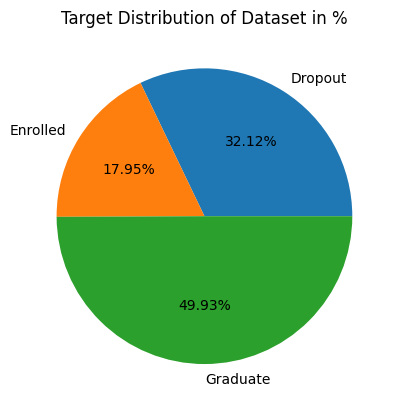

In [124]:
# 1. Calculate and display target value counts:

# - Group data by the 'Target' column and count occurrences of each target value.
target_counts = data.groupby('Target').size()

# - Print the target counts for clear understanding of the distribution.
print(target_counts)


# 2. Visualize the target distribution:

# - Create a pie chart to effectively visualize the proportion of each target value.
plt.pie(target_counts, labels=target_counts.index, autopct="%.2f%%")  # Use target counts as slices and their labels.

# - Set informative title and display the plot.
plt.title("Target Distribution of Dataset in %")
plt.show()

`We can see almost 50% of student in the dataset have graduated.`

#### Demographic

##### Marital Status
- We can see if marital status can affect academic status of students.

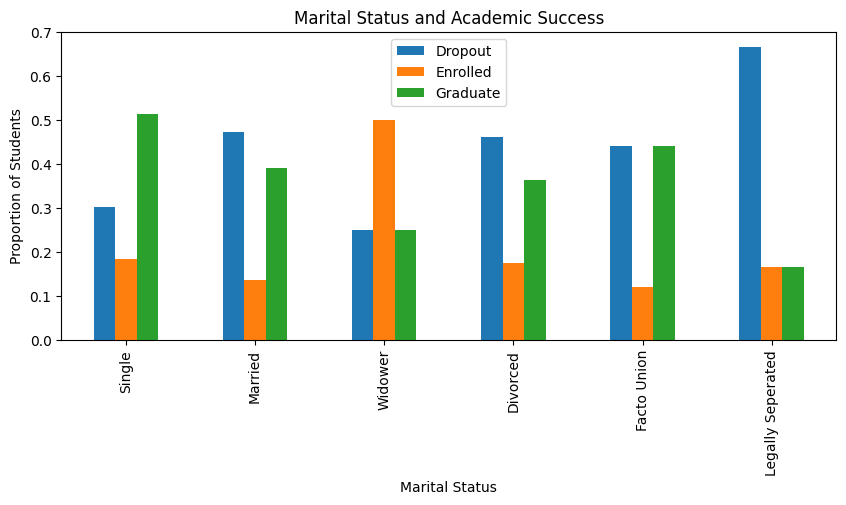

In [125]:
# Create a contingency table showing the distribution of "Target" variable
# across different marital statuses, normalized by row (proportions within each group)
marital_status_target_crosstab = pd.crosstab(data["Marital Status"], data["Target"], normalize='index')

# Plot the crosstab as a bar chart to visualize the proportions
marital_status_target_crosstab.plot(kind="bar", figsize=(10,4), title="Marital Status and Academic Success")

# Set custom x-axis labels for better readability (assuming these labels correspond to the categories in your data)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])

# Label the axes for clarity
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Students')  # Corrected label as proportions are shown

# Display the legend (optional, depends on the number of categories in the "Target" variable)
plt.legend(loc=9)

# Display the plot
plt.show()

`We can see from the data that single students have the highest number of graduants, legally separated have the highest number of dropout and facto union student have equally number of dropout and graduate.`

##### Education Level
- We can see if previous qualification can affect the academic success.

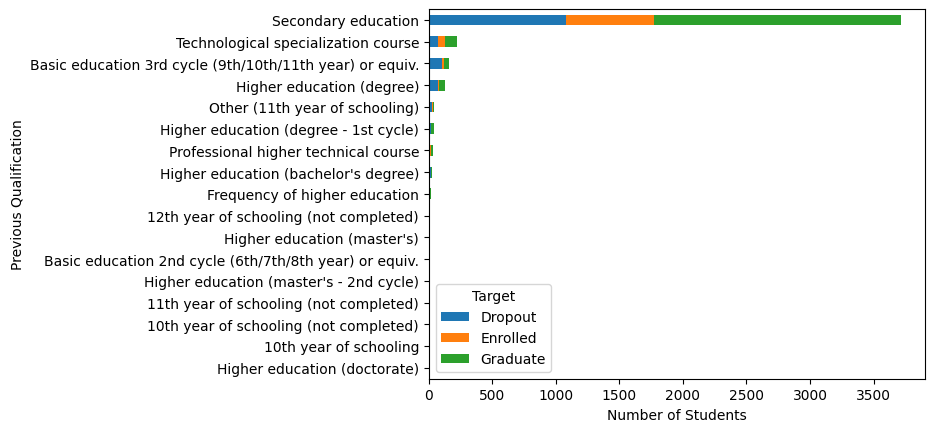

In [126]:
# Group and count by previous qualification and target
previous_qualification = data.groupby(['Previous qualification', 'Target']).size().reset_index().pivot(columns='Target', index='Previous qualification', values=0)

# Rename lengthy and cryptic qualification labels for better readability
previous_qualification = previous_qualification.rename(index={
    1: "Secondary education",
    2: "Higher education (bachelor's degree)",
    3: "Higher education (degree)",
    4: "Higher education (master's)",
    5: "Higher education (doctorate)",
    6: "Frequency of higher education",
    9: "12th year of schooling (not completed)",
    10: "11th year of schooling (not completed)",
    12: "Other (11th year of schooling)",
    14: "10th year of schooling",
    15: "10th year of schooling (not completed)",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education (degree - 1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education (master's - 2nd cycle)"
})

# Calculate total students for each previous qualification
previous_qualification_total = previous_qualification.sum(axis=1)

# Sort qualifications by total student count (ascending)
previous_qualification_sorted = previous_qualification_total.sort_values(ascending=True)

# Create a stacked bar chart to visualize distribution
previous_qualification.loc[previous_qualification_sorted.index].plot(kind='barh', stacked=True)

# Add labels and display the plot
plt.xlabel('Number of Students')
plt.ylabel('Previous Qualification')
plt.show()

`The data comprises of majority is from secondary education, which accounts for the highest frequency among all the previous qualification. This means that the previous qualification feature may not a good predictor or an explanatory variable for the outcome of student dropout. So it maybe can consider to be removed.`

##### Nationality
- We can see if different nationality can affect academic status of students.

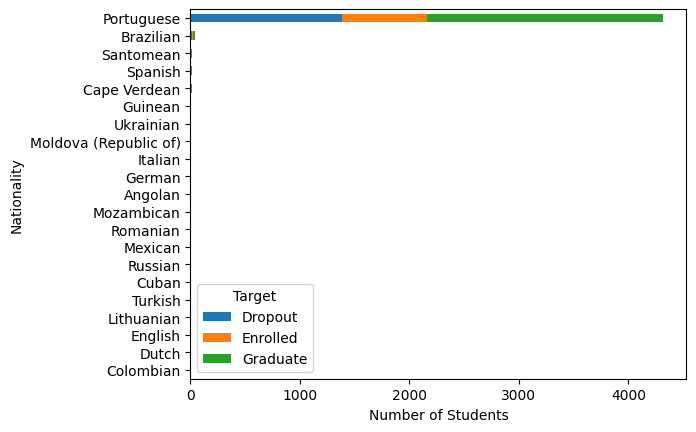

In [127]:
# Group and count by Nationality and Target
nationality = data.groupby(['Nationality', 'Target']).size().reset_index().pivot(columns='Target', index='Nationality', values=0)

# Rename the index of the DataFrame (Consider using a mapping dictionary for efficiency)
nationality = nationality.rename(index={1: "Portuguese",
                                         2: "German",
                                         6: "Spanish",
                                         11: "Italian",
                                         13: "Dutch",
                                         14: "English",
                                         17: "Lithuanian",
                                         21: "Angolan",
                                         22: "Cape Verdean",
                                         24: "Guinean",
                                         25: "Mozambican",
                                         26: "Santomean",
                                         32: "Turkish",
                                         41: "Brazilian",
                                         62: "Romanian",
                                         100: "Moldova (Republic of)",
                                         101: "Mexican",
                                         103: "Ukrainian",
                                         105: "Russian",
                                         108: "Cuban",
                                         109: "Colombian"})

# Calculate total students per nationality
nationality_total = nationality.sum(axis=1)

# Sort nationalities by total student count
nationality_sorted = nationality_total.sort_values(ascending=True)

# Create stacked bar chart to visualize distribution of students by nationality
nationality.loc[nationality_sorted.index].plot(kind='barh', stacked=True)

# Label the chart axes
plt.xlabel('Number of Students')
plt.ylabel('Nationality')

# Display the chart
plt.show()

`The data comprises of majority is from Portuguese nationality, which accounts for the highest frequency in nationality feature in the dataset. This means that nationality feature may not a good predictor or an explanatory variable for the outcome of student dropout. So it maybe can consider to be removed.`

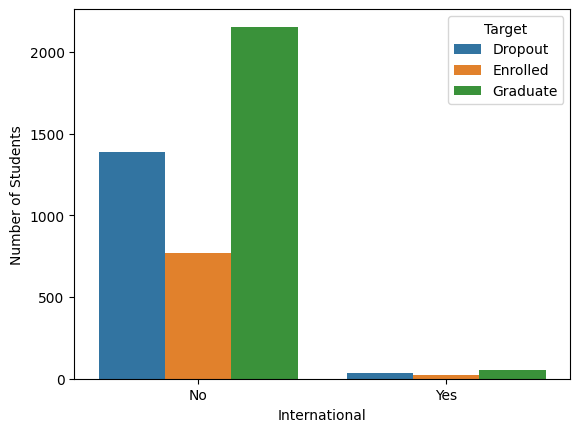

In [128]:
# International tudent distribution by Target
sns.countplot(data=data, x='International', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

# Customize plot for readability
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Replace numeric labels with 'No' and 'Yes' for clarity
plt.ylabel('Number of Students')  # Label the y-axis
plt.show()

`Majority of the data comprised of non-international student. International feature may be consider to be removed.`

##### Gender
- We can see if gender affecting academic status of students.

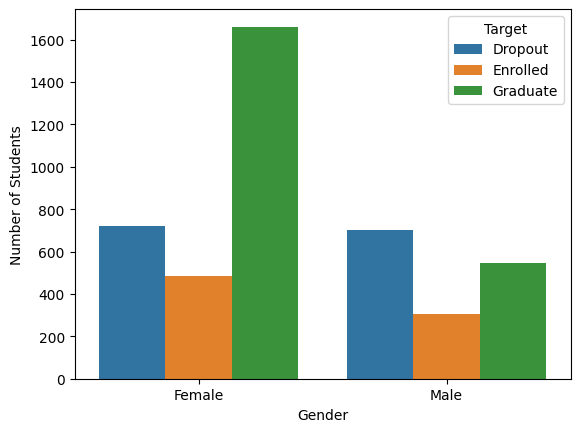

In [130]:
# Create a countplot with hue for Target and custom hue order
sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

# Customize x-axis labels for better readability
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Label the y-axis
plt.ylabel('Number of Students')

# Display the chart
plt.show()

`We can see from the data that females have the highest number of graduants but also have the slightly highest number of dropouts compared to males.`

##### Age
- We can see the distribution of age of enrollment in the dataset

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64


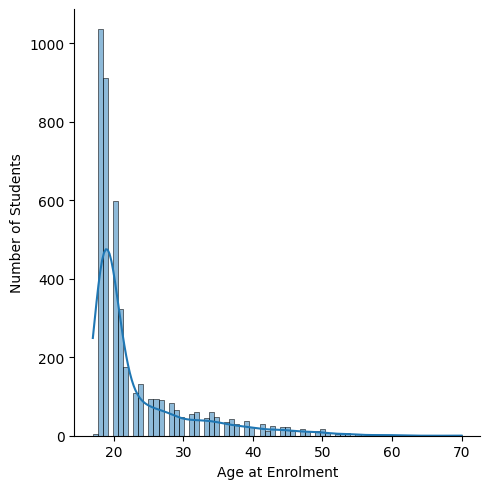

In [131]:
# Generate a distribution plot of age at enrollment with a kernel density estimation (KDE) line
sns.displot(data=data, x='Age at enrollment', kde=True)

# Calculate summary statistics of age at enrollment
print(data['Age at enrollment'].describe())  # Alternatively, data.describe()

# Label the chart axes for clarity
plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')

# Display the generated plot
plt.show()

`The distribution of student enrollment ages is skewed to the right. This indicates that most students enroll between 17 and 70 years old, with an average enrollment age of 23 years old.`

<a name="5.2"></a>
### 5.2 - Feature Selection
- Group the feature to find the correlation with Target variable. Highly correlated feature can be removed as ensures that the model is accurate and efficient, while still being interpretable and manageable.
- Objective of this project to predicting Student's dropout and academic success (Graduated), thus 'Enrolled' category in Target feature can be ignored.

#### Grouping the feature
- Grouping the feature into group:
  1. Demographic data
  2. Social data
  3. Economy data
  4. Academic data

In [132]:
# Demographic data

demo_data = data[["Marital Status", "Nationality", "Displaced", "Gender", "Age at enrollment", "International"]]

# Demographic data: Select columns columns containing demographic information about students, such as marital status, nationality, displacement status, gender, enrollment age, and international student status.

# Social data

soc_data = data[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 
                 "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"]]

# Social data: Select columns containing social data related to students' families, including parents' qualifications and occupations, special educational needs, debt status, tuition fee payment status, and scholarship status.

# Economy Data

eco_data = data[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 
                 'Daytime/evening attendance', 'Previous qualification']]

# Economy Data: Select columns columns containing economic data relevant to students' backgrounds, such as unemployment rate, inflation rate, GDP, application mode, application order, chosen course, attendance format (daytime or evening), and previous qualifications.

# Academic data

aca_data = data[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
# Academic data: Select columns containing academic data related to students' course performance, including credited units, enrolled units, evaluations completed, units passed, grades achieved, unevaluated units (for both semesters), and similar metrics for the second semester.

##### Build Correlation Matrix

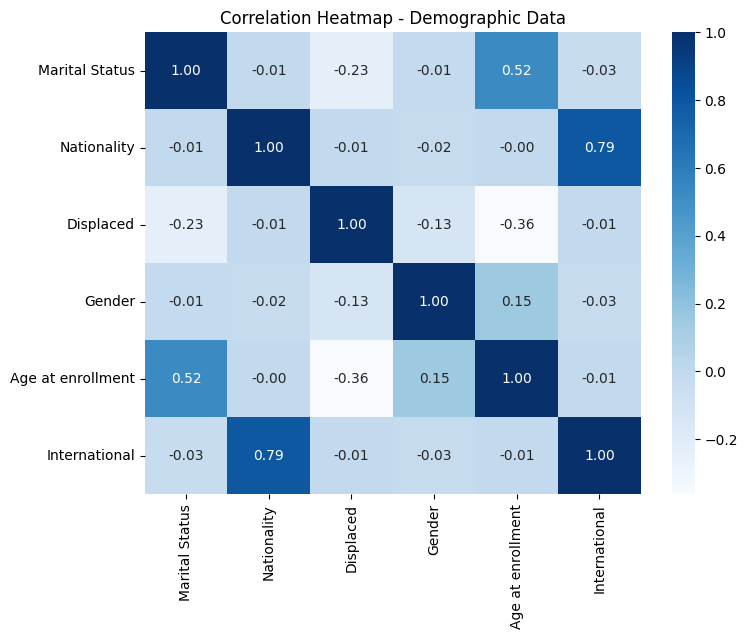

In [133]:
# Create a correlation matrix heatmap to visualize relationships between demographic variables

# Set figure size for better visualization
plt.figure(figsize=(8, 6))

# Generate heatmap using Seaborn with clear annotations
sns.heatmap(demo_data.corr(), 
           annot=True,  # Display correlation values on each cell
           fmt='.2f',    # Format values with two decimal places
           cmap="Blues")  # Use a blue color palette for visual clarity

# Add a descriptive title to the plot
plt.title('Correlation Heatmap - Demographic Data')

# Display the heatmap
plt.show()

 `International and Nationality has 0.79 quite highly correlated while all other features seem to be normally related.`

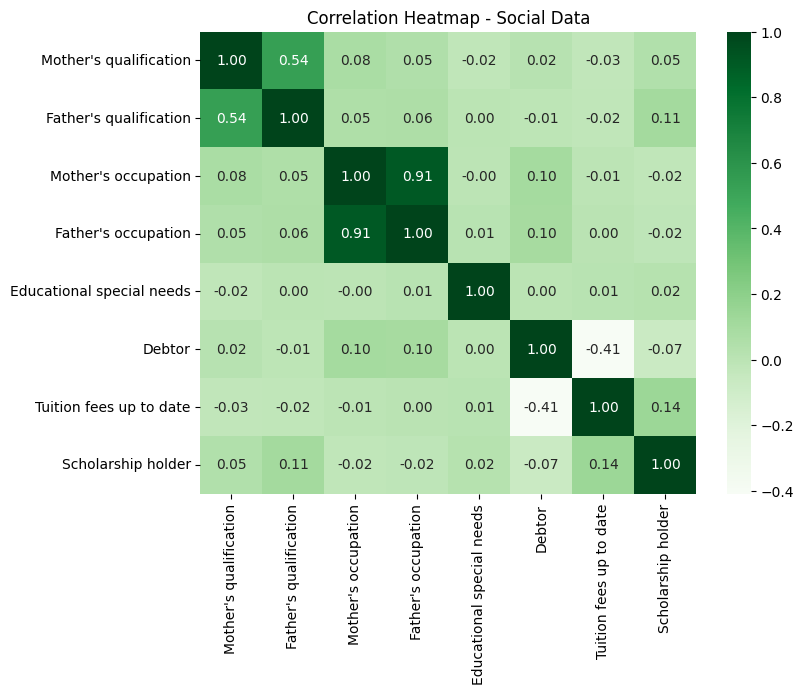

In [134]:
# Correlation Matrix for Social data

# Create a correlation heatmap to visualize relationships between variables in the social dataset

# Set figure size for better visualization
plt.figure(figsize=(8, 6))

# Generate the heatmap using Seaborn with informative features
sns.heatmap(
    soc_data.corr(),  # Calculate the correlation matrix for all variables
    annot=True,      # Display correlation values within cells
    fmt='.2f',      # Format correlation values to two decimal places
    cmap="Greens",   # Use a green color palette for visual clarity
)

# Set a descriptive title for the plot
plt.title("Correlation Heatmap - Social Data")

# Display the heatmap
plt.show()

`Mother's occupation and Father's occupation has 0.91  highly correlated while all other features seem to be normally related.`

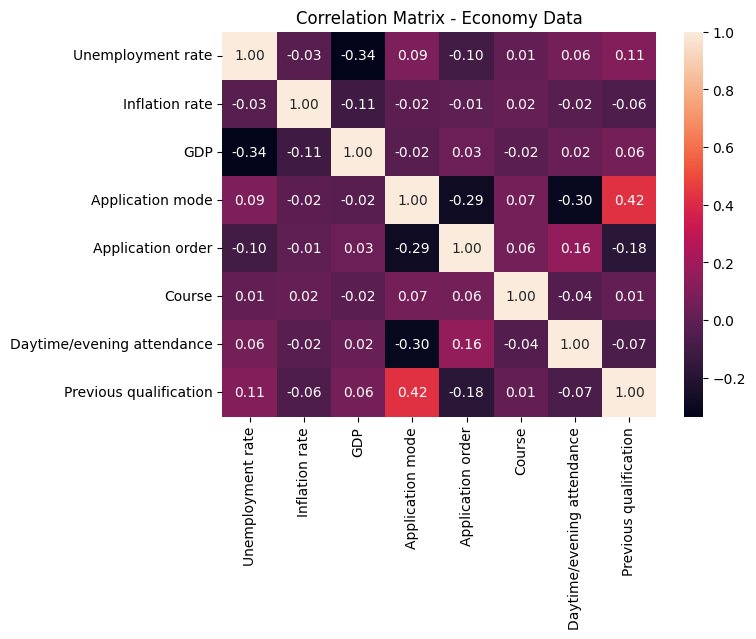

In [135]:
# Create a correlation heatmap to visualize relationships between economic variables

plt.figure(figsize=(7, 5))  # Set figure size for readability

# Generate the heatmap using Seaborn with informative features
sns.heatmap(
    eco_data.corr(),  # Calculate correlation matrix for economic data
    annot=True,      # Display correlation values within cells
    fmt='.2f',       # Format correlation values to two decimal places
)

# Set a descriptive title for the plot
plt.title('Correlation Matrix - Economy Data')

# Display the heatmap
plt.show()

`All other features seem to be normally related.`

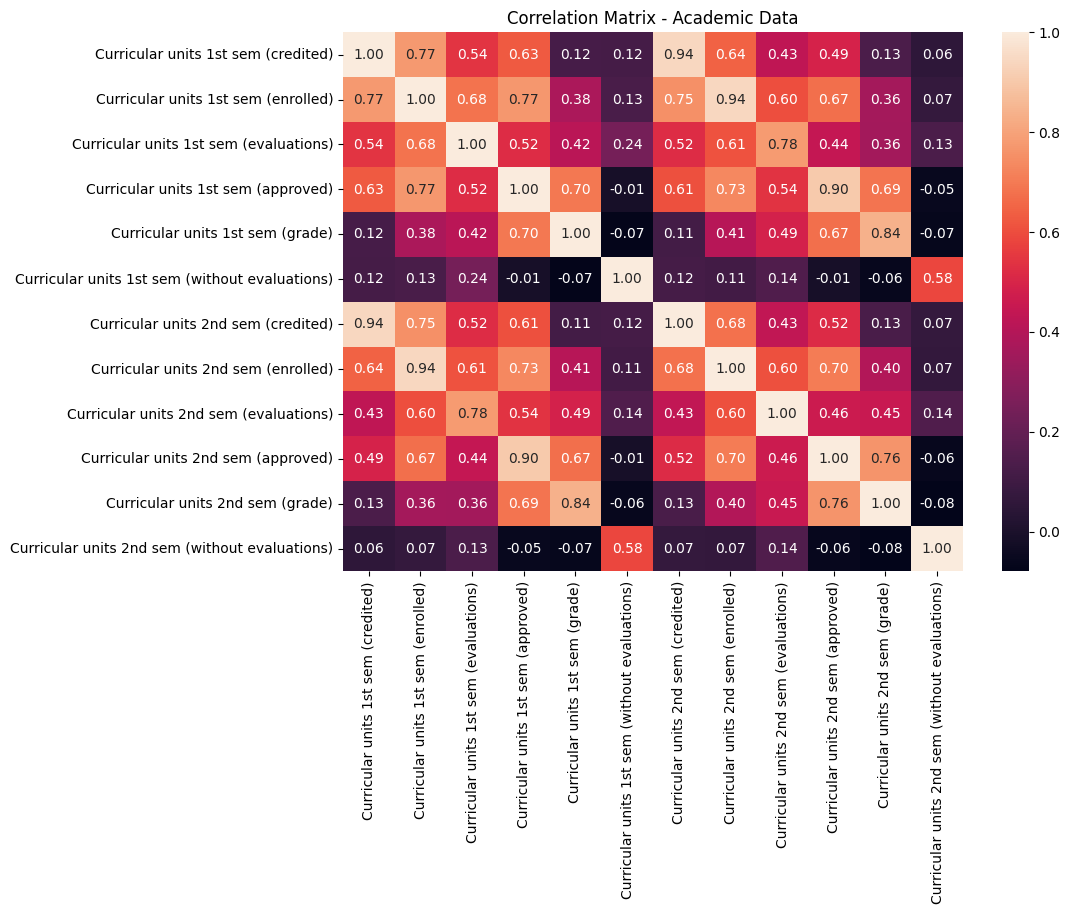

In [136]:
# Create a correlation heatmap to visualize relationships between academic variables

plt.figure(figsize=(10, 7))  # Set a larger figure size for potentially more variables

# Generate the heatmap using Seaborn with informative features
sns.heatmap(
    aca_data.corr(),  # Calculate correlation matrix for academic data
    annot=True,      # Display correlation values within cells
    fmt='.2f',       # Format correlation values to two decimal places
)

# Set a descriptive title for the plot
plt.title('Correlation Matrix - Academic Data')

# Display the heatmap
plt.show()

From the correlation Matrix for Academic Data
* Curricular units 1st sem (credited) correlates with 2nd sem = 0.94
* Curricular units 1st sem (enrolled) correlates with 2nd sem = 0.94
* Curricular units 1st sem (evaluation) correlates with 2nd sem = 0.78
* Curricular units 1st sem (approved) correlates with 2nd sem = 0.90
* Curricular units 1st sem (grade) correlates with 2nd sem = 0.84
  ___
`This seems 1st sem feature highly correlated to the 2nd sem, thus 1st sem feature may be consider to be removed as to avoid redundancy.`

#### Feature Eliminination
- Several feature have been recognized for not good predictor as it not balance:
  1. Nationality.
  2. International.
- Several feature have been recognized for highly correlated that can cause redundancy:
  1. Curricular units 1st sem (credited).
  2. Curricular units 1st sem (enrolled).
  3. Curricular units 1st sem (evaluations).
  4. Curricular units 1st sem (approved).
  5. Curricular units 1st sem (grade)
- These feature may can be further removed.
- Since we are predicting Student's dropout and graduate (academic success),'Enrolled' category in target variable may can be removed.

In [137]:
# Remove unwanted features from the dataset

data.drop([
    'Nationality',
    'International',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
], axis=1, inplace=True)

# View the first few rows of the modified DataFrame
data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,19,12,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,37,37,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,38,37,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,37,38,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [138]:
# Filter data to exclude rows where the Target value is 'Enrolled',
# handling potential leading/trailing whitespace in values

data = data[data['Target'].str.strip() != 'Enrolled']

# Display the distribution of remaining Target values
print(data['Target'].value_counts())

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64


#### One-hot encoding
- Since the target variable in categorical format, we convert it in numerical format using LabelEncoder class within the preprocessing submodule for this purpose.

In [139]:
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])
data.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,19,12,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,37,37,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,38,37,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,37,38,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


`Graduate labelled as 1` <br>
`Dropout labelled as 0`

<a name="6"></a>
## 6 - Model Training and Evaluation

<a name="6.1"></a>
### 6.1 - Split  feature and target, X and y

In [140]:
# Separate features (input variables) and target variable

# Assign features to X, excluding the Target column
X = data.drop('Target', axis=1)

# Assign the Target column as the target variable y
y = data['Target']

# Print shapes for verification
print("Dataset shape:", data.shape)
print("\nX shape:", X.shape)
print('\ny shape:', y.shape)

Dataset shape: (3630, 30)

X shape: (3630, 29)

y shape: (3630,)


<a name="6.2"></a>
### 6.2 - Feature Scaling
-  To standardize or normalize the range of independent variables or features of the dataset.

In [141]:
# Scale feature data (X) using MinMaxScaler

# Create a MinMaxScaler object
scaler = preprocessing.MinMaxScaler()

# Fit the scaler to X and transform it in one step
X = scaler.fit_transform(X)

`Scaling features to a range between 0 and 1`

<a name="6.3"></a>
### 6.3 - Split Dataset to Test Set and Train Data

In [142]:
# Split data into training and testing sets

# Set a random seed for reproducibility
seed = 33

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Print shapes for verification
print("X_train shape:", X_train.shape)
print("\nX_test shape:", X_test.shape)
print("\nY_train shape:", y_train.shape)
print("\nY_test shape:", y_test.shape)

X_train shape: (2904, 29)

X_test shape: (726, 29)

Y_train shape: (2904,)

Y_test shape: (726,)


<a name="6.4"></a>
### 6.4 - Prepare Machine Learning Model

#### Classification Report

- Scikit-learn's `classification_report()` function is like a report card for classification models.
- It gives a quick snapshot of how well the model is doing for different categories.
- Precision tells us how often the model is correct when it predicts a certain category.
- Recall shows how many of the actual cases the model catches.
- The F1-score is a balanced measure that considers both precision and recall together.
#### Classifier Algorithms
- Four Classifier Algorithms were used in this project:
  1. Logistic Regression
  2. K- Nearest Neighbours
  3. Random Forest
  4. Decision Tree

##### Logistic Regression

In [143]:
# Create an instance of LogisticRegression with the 'liblinear' solver
model_lr = LogisticRegression(solver='liblinear')

# Train the logistic regression model on the training data
model_lr.fit(X_train, y_train)

# Predict the target values for the test data using the trained model
predicted = model_lr.predict(X_test)

# Generate a classification report to evaluate the model's performance
report = classification_report(y_test, predicted)

# Print the classification report for logistic regression model
print("Logistic Regression:\n", report)

Logistic Regression:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86       306
           1       0.87      0.95      0.91       420

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



###### Performance:
- **Accuracy**: The model achieves an accuracy of 89%. This means out of 726 data points (total support), the model correctly classified 89% of them.

- **Precision**: This metric tells us how many of the predicted positive cases were actually positive.
  - **Class 0**: For every 100 data points the model predicted as Class 0, 92 of them were truly Class 0. (Precision of 0.92 for Class 0)
  - **Class 1**: For every 100 data points the model predicted as Class 1, 87 of them were truly Class 1. (Precision of 0.87 for Class 1)

- **Recall**: This metric tells us how many of the actual positive cases were identified by the model.
  - **Class 0**: Out of all the actual Class 0 cases, the model identified 80% of them. (Recall of 0.80 for Class 0)
  - **Class 1**: Out of all the actual Class 1 cases, the model identified 95% of them. (Recall of 0.95 for Class 1)

- **F1-Score**: This metric is a harmonic mean of precision and recall, providing a balanced view.
  - **Class 0**: The F1-score for Class 0 is 0.86.
  - **Class 1**: The F1-score for Class 1 is 0.91.

##### K- Nearest Neighbours

In [144]:
# Create an instance of the KNeighborsClassifier model
model_knn = KNeighborsClassifier()

# Train the KNeighborsClassifier model on the training data
model_knn.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
predicted = model_knn.predict(X_test)

# Generate a classification report to evaluate the performance of the KNeighborsClassifier model
report = classification_report(y_test, predicted)

# Print the classification report
print("K- Nearest Neighbours:\n", report)

K- Nearest Neighbours:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       306
           1       0.79      0.94      0.86       420

    accuracy                           0.83       726
   macro avg       0.84      0.80      0.81       726
weighted avg       0.84      0.83      0.82       726



###### Performance:
- **Accuracy**: The K-Nearest Neighbors model achieved an accuracy of 83%. This indicates that out of 726 data points, the model correctly classified 83% of them.

- **Precision**: Precision measures the proportion of positive predictions that were truly positive.
  - **Class 0**: The model achieved a precision of 0.89 for Class 0. This means that for every 100 data points predicted as Class 0, 89 were actually Class 0.
  - **Class 1**: The model achieved a precision of 0.79 for Class 1. This means that for every 100 data points predicted as Class 1, 79 were actually Class 1.

- **Recall**: Recall measures the proportion of actual positive cases that were identified by the model.
  - **Class 0**: The model achieved a recall of 0.66 for Class 0. This means that out of all the actual Class 0 cases, the model identified 66%.
  - **Class 1**: The model achieved a recall of 0.94 for Class 1. This means that out of all the actual Class 1 cases, the model identified 94%.

- **F1-Score**: F1-score is a harmonic mean between precision and recall, offering a balanced view of model performance.
  - **Class 0**: The F1-score for Class 0 is 0.76.
  - **Class 1**: The F1-score for Class 1 is 0.86.


##### Random Forest

In [145]:
# Create an instance of the RandomForestClassifier
model_rf = RandomForestClassifier()

# Train the RandomForestClassifier using the training data (X_train, y_train)
model_rf.fit(X_train, y_train)

# Make predictions on the test data (X_test)
predicted = model_rf.predict(X_test)

# Generate a classification report to evaluate the performance of the RandomForestClassifier
report = classification_report(y_test, predicted)

# Print the classification report
print("Random Forest:\n", report)

Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       306
           1       0.89      0.95      0.92       420

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



###### Performance:
- **Accuracy**: The model achieves an accuracy of 90%. This means out of 726 data points (total support), the model correctly classified 90% of them.

- **Precision**: This metric tells us how many of the predicted positive cases were actually positive.
  - **Class 0**: For every 100 data points the model predicted as Class 0, 93 of them were truly Class 0. (Precision of 0.93 for Class 0)
  - **Class 1**: For every 100 data points the model predicted as Class 1, 89 of them were truly Class 1. (Precision of 0.89 for Class 1)

- **Recall**: This metric tells us how many of the actual positive cases were identified by the model.
  - **Class 0**: Out of all the actual Class 0 cases, the model identified 83% of them. (Recall of 0.83 for Class 0)
  - **Class 1**: Out of all the actual Class 1 cases, the model identified 95% of them. (Recall of 0.95 for Class 1)

- **F1-Score**: This metric is a harmonic mean of precision and recall, providing a balanced view.
  - **Class 0**: The F1-score for Class 0 is 0.88.
  - **Class 1**: The F1-score for Class 1 is 0.92.


##### Decision Tree

In [146]:
# Create an instance of the DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

# Train the DecisionTreeClassifier on the training data
model_dt.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
predicted = model_dt.predict(X_test)

# Generate a classification report to evaluate the performance of the Decision Tree model
report = classification_report(y_test, predicted)

# Print the classification report
print("Decision Tree:\n", report)

Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       306
           1       0.87      0.88      0.88       420

    accuracy                           0.86       726
   macro avg       0.85      0.85      0.85       726
weighted avg       0.86      0.86      0.86       726



###### Performance:
- **Accuracy**: The decision tree model achieved an accuracy of 86%. This indicates that out of 726 data points, the model correctly classified 86% of them.

- **Precision**: This metric evaluates the proportion of true positives among the predicted positives for each class.
  - **Class 0**: The model has a precision of 0.84 for Class 0. In other words, for every 100 data points predicted as Class 0, 84 were actually Class 0.
  - **Class 1**: The model has a precision of 0.88 for Class 1. This means for every 100 predicted as Class 1, 88 were truly Class 1.

- **Recall**: This metric assesses the model's ability to identify actual positive cases for each class.
  - **Class 0**: The model has a recall of 0.83 for Class 0. This signifies that the model identified 83% of all actual Class 0 cases.
  - **Class 1**: The model has a recall of 0.88 for Class 1. This indicates that the model identified 88% of all actual Class 1 cases.

- **F1-Score**: This metric provides a balanced view by considering both precision and recall. It's the harmonic mean between the two.
  - **Class 0**: The F1-score for Class 0 is 0.83.
  - **Class 1**: The F1-score for Class 1 is 0.88.

<a name="7"></a>
## 7 - Hyperparameter Tuning

<a name="7.1"></a>
### 7.1 - Build function for Grid Search Cross-Validation

In [147]:
# Function for performing grid search using GridSearchCV
# Parameters:
# - model: The machine learning model to be tuned
# - kfolds: The number of folds for cross-validation
# - params: The parameter grid to search over
# - scoring: The scoring metric to optimize
# Returns:
# - grid_search: GridSearchCV object configured with provided parameters
def grid_search(model, kfolds, params, scoring):
    grid_search = GridSearchCV(model,
                                cv=kfolds,
                                param_grid=params,
                                scoring=scoring,
                                n_jobs=1,
                                verbose=1)
    return grid_search

In [148]:
# Set up k-fold cross-validation with 10 splits, ensuring reproducibility by fixing the random state to 33 and shuffling the data.
kfold = KFold(n_splits=10, random_state=33, shuffle=True)

<a name="7.2"></a>
### 7.2 - Tuning Model

#### Logistic Regression

In [149]:
# Ignore all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Declare hyperparameters for logistic regression
params_lr = {
    'C': [0.01, 1, 10,100],
    'penalty': ['11', '12', 'elasticnet', 'none'],
    'solver': ['liblinear', 'newton-cg', 'saga']
}

# Perform GridSearchCV for logistic regression using previously defined Logistic Regression model (model_lr)
grid_search_lr = grid_search(model_lr, kfold, params_lr, scoring=None)

# Fit the grid search object to the training data
grid_search_lr.fit(X_train, y_train)

# Display the best score and best hyperparameters found by GridSearch for Logistic Regression
print("\nBest Score: {:.2f}%".format(grid_search_lr.best_score_ * 100))
print("\nBest Hyperparameters:", grid_search_lr.best_params_)

# Filter specific warnings to maintain a clean output
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


Fitting 10 folds for each of 48 candidates, totalling 480 fits

Best Score: 90.98%

Best Hyperparameters: {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}


##### Test the tuned model with test data using best hyperparameter obtained

In [150]:
# Use the Best Hyperparameter got from GridSearch CV
tuned_lr = LogisticRegression(C=0.01, penalty='none', solver='saga')

# Train the dataset
tuned_lr.fit(X_train, y_train)

# Use the model to predict the output using test data
y_pred = tuned_lr.predict(X_test)

# Calculate accuracy, precision and recall
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display accuracy, precision and recall results
print("Accuracy:  {:.2f}%".format(accuracy* 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall:    {:.2f}%".format(recall * 100))

# Filter the warning to avoid cluttering the output
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


Accuracy:  89.67%
Precision: 88.08%
Recall:    95.00%


#### K- Nearest Neighbours

In [151]:
# Ignore all warnings to keep the output clean
warnings.filterwarnings("ignore")

# Declare hyperparameters for K-Nearest Neighbors
params_knn = {
    'n_neighbors' : [1, 2, 3, 4, 8, 9, 14, 19, 20, 25],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform GridSearchCV for K-Nearest Neighbors, previously K-Nearest Neighbors model assigned as model_knn
grid_search_knn = grid_search(model_knn, kfold, params_knn, scoring=None)

# Fitting the grid search object to the training data
grid_search_knn.fit(X_train, y_train)

# Display GridSearch for K-Nearest Neighbors best score and best hyperparameters
print("\nBest Score: {:.2f}%".format(grid_search_knn.best_score_ * 100))
print("\nBest Hyperparameters:", grid_search_knn.best_params_)

Fitting 10 folds for each of 80 candidates, totalling 800 fits

Best Score: 83.89%

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}


##### Test the tuned model with test data using best hyperparameter obtained

In [152]:
# Use the Best Hyperparameter got from GridSearch CV
tuned_knn = KNeighborsClassifier(algorithm='auto', n_neighbors=20, weights='distance')

# Train the dataset
tuned_knn.fit(X_train, y_train)

# Use the model to predict the output using test data
y_pred = tuned_knn.predict(X_test)

# Calculate accuracy, precision and recall
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display accuracy, precision and recall results
print("Accuracy:  {:.2f}%".format(accuracy* 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall:    {:.2f}%".format(recall * 100))

# Filter the warning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Accuracy:  81.68%
Precision: 77.44%
Recall:    96.43%


#### Random Forest

In [153]:
# Ignore all warnings
warnings.filterwarnings("ignore")

# Declare hyperparameter for Random Forest
params_rf = {
    'n_estimators': [1, 10],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'oob_score': [True, False],
    'n_jobs': [None],
    'random_state': [None],
    'verbose': [0],
    'warm_start': [False],
    'class_weight': [None],
    'ccp_alpha': [0.0],
    'max_samples': [None]
}

# Perform GridSearchCV for Random Forest, previously Random Forest model assign as model_rf
grid_search_rf = grid_search(model_rf, kfold, params_rf, scoring=None)

# Fitting the grid search object to the training data
grid_search_rf.fit(X_train, y_train)

# Display GridSearch for Random Forest best score and best hyperparameter
print("\nBest Score: {:.2f}%".format(grid_search_rf.best_score_ * 100))
print("\nBest Hyperparameter:",grid_search_rf.best_params_)


Fitting 10 folds for each of 576 candidates, totalling 5760 fits

Best Score: 90.63%

Best Hyperparameter: {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


##### Test the tuned model with test data using best hyperparameter obtained

In [158]:
# Use the Best Hyperparameter got from GridSearch CV
tuned_rf = RandomForestClassifier(**{
    'bootstrap': False,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_samples': None,
    'min_samples_leaf': 4,
    'min_samples_split': 5,
    'n_estimators': 10,
    'n_jobs': None,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False
})
# Train the dataset
tuned_rf.fit(X_train, y_train)

# Use the model to predict the output using test data
y_pred = tuned_rf.predict(X_test)

# Calculate accuracy, precision and recall
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display accuracy, precision and recall results
print("Accuracy:  {:.2f}%".format(accuracy* 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall:    {:.2f}%".format(recall * 100))

# Filter the warning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


Accuracy:  89.12%
Precision: 87.64%
Recall:    94.52%


#### Decision Tree

In [155]:
# Ignore all warnings
warnings.filterwarnings("ignore")

# Declare hyperparameter for Decision Tree
params_dt = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 30],
}
# Perform GridSearchCV for Decision Tree, previously Decision Tree model assign as model_dt
grid_search_dt = grid_search(model_dt, kfold, params_dt, scoring=None)

# Fitting the grid search object to the training data
grid_search_dt.fit(X_train, y_train)

# Display GridSearch for Random Forest best score and best hyperparameter
print("\nBest Score: {:.2f}%".format(grid_search_dt.best_score_ * 100))
print("\nBest Hyperparameter:",grid_search_dt.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits

Best Score: 88.84%

Best Hyperparameter: {'max_depth': 5, 'min_samples_leaf': 10}


##### Test the tuned model with test data

In [156]:
# Use the Best Hyperparameter got from GridSearch CV
tuned_dt = DecisionTreeClassifier(max_depth=  5, min_samples_leaf= 10)

# Train the dataset
tuned_dt.fit(X_train, y_train)

# Use the model to predict the output using test data
y_pred = tuned_dt.predict(X_test)

# Calculate accuracy, precision and recall
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display accuracy, precision and recall results
print("Accuracy:  {:.2f}%".format(accuracy* 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall:    {:.2f}%".format(recall * 100))

# Filter the warning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Accuracy:  88.57%
Precision: 85.62%
Recall:    96.43%


<a name="8"></a>
## 8 - Results and Discussion
After hyperparameter tuning, the models show varying levels of performance across accuracy, precision, and recall metrics:

| **Model**               | **Accuracy** | **Precision** | **Recall** |
|-------------------------|--------------|---------------|------------|
| LogisticRegression      |   89.67%     |   88.08%      |   95.00%   |
| KNeighborsClassifier    |   81.68%     |   77.44%      |   96.43%   |
| RandomForestClassifier  |   89.12%     |   87.64%      |   94.52%   |
| DecisionTreeClassifier  |   88.57%     |   85.62%      |   96.43%   |

- **Logistic Regression**: Achieves the highest accuracy at 89.67%, with a respectable precision of 88.08% and a high recall of 95.00%. This indicates that the model performs well overall and has a good balance between precision and recall.

- **K-Nearest Neighbors (KNN)**: Despite having a relatively lower accuracy of 81.68%, KNN exhibits a high recall of 96.43%, indicating its effectiveness in correctly identifying positive instances. However, its precision at 77.44% suggests that it may be prone to false positives.

- **Random Forest Classifier**: This model performs competitively with an accuracy of 89.12%. It shows a precision of 87.64% and a recall of 94.52%, indicating a balanced performance in identifying both positive and negative instances.

- **Decision Tree Classifier**: Similar to the Random Forest Classifier, the Decision Tree model achieves a high accuracy of 88.57%. It demonstrates a precision of 85.62% and a recall of 96.43%, indicating good performance in correctly classifying instances.

In summary, after hyperparameter tuning, all models show improvements in their performance metrics. The choice of the best model may depend on the specific requirements of the application, such as the importance of precision versus recall. For instance, if identifying all positive instances (high recall) is crucial, KNN might be preferred despite its lower accuracy. Conversely, if a balanced performance is desired, Logistic Regression or Random Forest Classifier could be the better choices.<br><br>
`Logistic regression achieves the highest accuracy among the models while maintaining respectable precision and recall, indicating its effectiveness in accurately predicting outcomes across various performance metrics.`

### Prediction System Based on Evaluated Machine Learning Model

In [157]:
# Logistic Regression is chosen as the best performing model after hyperparameter tuning.

# Selecting a specific input data point from the dataset for prediction.
input_data = X[3001]

# Converting the input data to a NumPy array.
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the input data to match the expected shape for prediction.
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Making a prediction using the tuned logistic regression model.
prediction = tuned_lr.predict(input_data_reshaped)

# Mapping prediction value to human-readable labels
result = "Dropout" if prediction == 0 else "Graduated"

# Displaying the predicted result.
print("Prediction result:", result)

# Displaying the actual value from the dataset for comparison.
print("\nThe actual value : ", "Graduated" if y.iloc[3001] == 1 else "Dropout")

Prediction result: Graduated

The actual value :  Graduated
